In [1]:
import image_preprocessing as pre_proc

In [5]:
pre_proc.download_db()

C:\Users\levi2\AppData\Roaming\Python\Python311\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\levi2\AppData\Roaming\Python\Python311\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\levi2\AppData\Roaming\Python\Python311\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

In [6]:
pre_proc.extract_files()

In [3]:
pre_proc.unroll_scale_images()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img data type = 15 is not supported
>  - Expected Ptr<cv::UMat> for argument 'img'


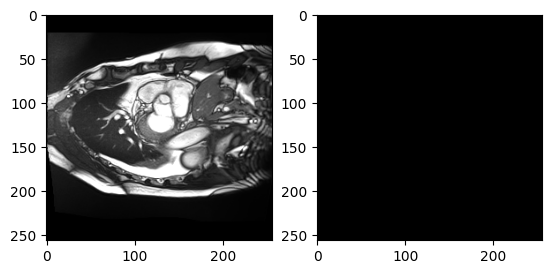

In [3]:
import matplotlib.pyplot as plt
full_scale = plt.imread('./train_valid/original_images/patient001_0_0.png')
scaled_down = plt.imread('./train_valid/downscaled_images/patient001_0_0.png')

plt.subplot(1, 2, 1)
plt.imshow(full_scale, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(scaled_down, cmap='gray')



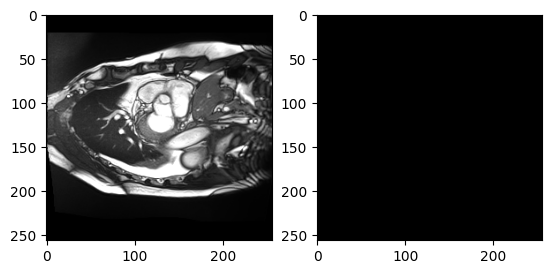

In [3]:
pre_proc.show_example_images()

In [15]:
import matplotlib.pyplot as plt
import cv2
import imageio
import time
import numpy as np
import math
full_scale = plt.imread('./train_valid/original_images/patient001_0_0.png')
#scaled_down = plt.imread('./train_valid/downscaled_images/patient001_0_0.png')


ft=np.fft.ifftshift(np.fft.ifftn(np.fft.ifftshift(full_scale)))
ft[:75,:]=0
ft[:,:75]=0
ft[150:,:]=0
ft[:,150:]=0

inverse_ft=np.fft.ifftshift(np.fft.fftn(np.fft.ifftshift(ft))).real

x_diff = (256 - full_scale.shape[1]) // 2
y_diff = (256 - full_scale.shape[0]) // 2

downscaled_image = np.pad(inverse_ft, ((y_diff, y_diff), (x_diff, x_diff)), 'constant')

cv2.imwrite('ASD.png', downscaled_image)

# st = time.time()
# print(time.time() - st)
# imageio.imwrite('filename.png', inverse_ft)
# print(time.time() - st)
st = time.time()
plt.imsave('PLT.png', downscaled_image, cmap='gray')
print(time.time() - st)

0.020941495895385742


In [2]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = pre_proc.load_and_transform_data(0.7, 0.2, 0.1, 100)

In [3]:
print('training data set size:', len(X_train), len(X_train[0]))
print('validation data set size:', len(X_valid), len(X_valid[0]))
print('test data set size:', len(X_test), len(X_test[0]))

training data set size: 70 256
validation data set size: 20 256
test data set size: 10 256
